# Settings

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import time
import psutil
import utils
import os
import csv

### Select Dataset 1 or Dataset 2

In [2]:
while True:
    set_dataset = input(
        "Choose a dataset. \nPress [1] for dataset_1.csv & blind_test1.csv \nPress [2] for dataset_2.csv & blind_test2.csv\nPress [exit] to quit\n")

    if set_dataset == '1':
        filepath_train = 'dataset1.csv'
        filepath_prediction = 'blind_test1.csv'
        break
    elif set_dataset == '2':
        filepath_train = 'dataset2.csv'
        filepath_prediction = 'blind_test2.csv'
        break
    elif set_dataset.lower() == 'exit':
        print('You chose to exit.')
        break
    else:
        print('Invalid input. Please enter 1, 2, or type "exit" to quit.')

### Load Data Function

In [3]:
def load_data(csv_filepath):
    '''
    Load data from a csv file.

    :param csv_filepath: path of the .csv file containing the data to load/extract

    :return X: array of values associated with the inputs of the data contained in the .csv file
    :return Y: array of values associated with the labels of the data contained in the .csv file or None if the file does not contain labels
    '''

    data = pd.read_csv(csv_filepath)

    # Headers' list:
    headers = data.columns  # 'x' for inputs, 'y' for labels

    # Extract DataFrames based on the headers:
    x_data = data[headers[0]]

    # Convert an array-like string (e.g., '[0.02, 1.34\n, 2.12, 3.23\n]')
    # into an array of floats (e.g., [0.02, 1.34, 2.12, 3.23]):
    X_data = [[float(feature) for feature in feature_vec.replace('[', '').replace(']', '').split()] for feature_vec in
              x_data]

    # convert data into numpy arrays
    X = np.array(X_data)

    if len(headers) > 1:
        Y_data = data[headers[1]]
        Y = np.array(Y_data)
    else:
        Y = None

    return X, Y

### Data Import

In [4]:
X, Y = load_data(filepath_train)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Results Tables Inizialization

In [5]:
results = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'K-Nearest Neighbors', "XGBoost"],
    'Accuracy [%]': [],
    'F1 Score [%]': [],
    'Recall [%]': [],
    'Precision [%]': [],
    'Time [s]': [],
    'CPU Usage [%]': [],
    'CPU Maximum frequency [MHz]': [],
    'RAM Usage [%]': [],
    'RAM Used [GB]': []
}

results_CV = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'K-Nearest Neighbors', "XGBoost"],
    'Accuracy [%]': [],
    'F1 Score [%]': [],
    'Recall [%]': [],
    'Precision [%]': [],
    'Time [s]': [],
    'CPU Usage [%]': [],
    'CPU Maximum frequency [MHz]': [],
    'RAM Usage [%]': [],
    'RAM Used [GB]': []
}

### CPU and RAM Measure Inizialization 

In [6]:
def ram_usage():
    try:
        ram_info = psutil.virtual_memory()
        ram_used_gb = ram_info.used / 1024 / 1024 / 1024
        ram_percent = ram_info.percent
        return {'RAM Used [GB]': ram_used_gb, 'RAM Usage [%]': ram_percent}
    except FileNotFoundError:
        return {'RAM Used [GB]': None, 'RAM Usage [%]': None}

def cpu_usage():       
    try:
        cpu_percent = max(psutil.cpu_percent(interval=0.1, percpu=True))
        cpu_info = psutil.cpu_freq()
        return {'CPU Usage [%]': cpu_percent, 'CPU Maximum frequency [MHz]': cpu_info.max}
    except FileNotFoundError:
        return {'CPU Usage [%]': None, 'CPU Maximum frequency [MHz]': None}

# Unbalanced dataset verification

In [7]:
import pandas as pd

target_balance = sorted(Y)
conteggio_numeri = {}

for numero in target_balance:
    if numero in conteggio_numeri:
        conteggio_numeri[numero] += 1
    else:
        conteggio_numeri[numero] = 1

df = pd.DataFrame(list(conteggio_numeri.items()), columns=["Number", "Count"])

count_alert = any(conteggio < 1000 for conteggio in conteggio_numeri.values())

if count_alert:
    print("WARNING! Unbalanced Dataset")
else:
    print("Balanced Dataset")
    
df.head(10)

Balanced Dataset


,Number,Count
0,0,5000
1,1,5000
2,2,5000
3,3,5000
4,4,5000
5,5,5000
6,6,5000
7,7,5000
8,8,5000
9,9,5000


# Logistic Regression

### Training Logistic Regression without Cross - Validation

In [8]:
start_time_LR = time.time()
log_reg = LogisticRegression(max_iter=10000) #default value 100
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
log_reg_precision = precision_score(y_test, log_reg_predictions, average='macro')
log_reg_recall = recall_score(y_test, log_reg_predictions, average='macro')
log_reg_f1 = f1_score(y_test, log_reg_predictions, average='macro')
end_time_LR = time.time()
time_without_cv_LR = end_time_LR - start_time_LR

print(f"Logistic Regression Accuracy: {round(log_reg_accuracy*100, 2)} %")
print(f"Logistic Regression Precision: {round(log_reg_precision*100, 2)} %")
print(f"Logistic Regression Recall: {round(log_reg_recall*100, 2)} %")
print(f"Logistic Regression F1 Score: {round(log_reg_f1*100, 2)} %")

results['Accuracy [%]'].append(round(log_reg_accuracy * 100, 2))
results['F1 Score [%]'].append(round(log_reg_f1 * 100, 2))
results['Recall [%]'].append(round(log_reg_recall * 100, 2))
results['Precision [%]'].append(round(log_reg_precision * 100, 2))
results['Time [s]'].append(round(time_without_cv_LR, 2))

cpu_ram_info = cpu_usage(), ram_usage()
results['CPU Usage [%]'].append(cpu_ram_info[0]['CPU Usage [%]'])
results['CPU Maximum frequency [MHz]'].append(cpu_ram_info[0]['CPU Maximum frequency [MHz]'])
results['RAM Usage [%]'].append(cpu_ram_info[1]['RAM Usage [%]'])
results['RAM Used [GB]'].append(cpu_ram_info[1]['RAM Used [GB]'])

Logistic Regression Accuracy: 98.65 %
Logistic Regression Precision: 98.66 %
Logistic Regression Recall: 98.66 %
Logistic Regression F1 Score: 98.66 %


### Training Logistic Regression with Cross - Validation

In [9]:
start_time_LR_CV = time.time()
log_reg_cv_scores = LogisticRegression(max_iter=10000)
log_reg_cv_predictions = cross_val_predict(log_reg_cv_scores, X, Y, cv=5)
log_reg_mean_accuracy = np.mean(cross_val_score(log_reg_cv_scores, X, Y, cv=5))
log_reg_precision_cv = precision_score(Y, log_reg_cv_predictions, average='macro')
log_reg_recall_cv = recall_score(Y, log_reg_cv_predictions, average='macro')
log_reg_f1_cv = f1_score(Y, log_reg_cv_predictions, average='macro')
end_time_LR_CV = time.time()
time_with_cv_LR = end_time_LR_CV - start_time_LR_CV
cpu_training_cv_LR = cpu_usage()
ram_training_cv_LR = ram_usage()

print(f"Logistic Regression Cross-Validation Accuracy: {log_reg_mean_accuracy*100:.2f} %")
print(f"Logistic Regression Cross-Validation Precision: {round(log_reg_precision_cv*100, 2)} %")
print(f"Logistic Regression Cross-Validation Recall: {round(log_reg_recall_cv*100, 2)} %")
print(f"Logistic Regression Cross-Validation F1 Score: {round(log_reg_f1_cv*100, 2)} %")

results_CV['Accuracy [%]'].append(round(log_reg_mean_accuracy * 100, 2))
results_CV['F1 Score [%]'].append(round(log_reg_f1_cv * 100, 2))
results_CV['Recall [%]'].append(round(log_reg_recall_cv * 100, 2))
results_CV['Precision [%]'].append(round(log_reg_precision_cv * 100, 2))
results_CV['Time [s]'].append(round(time_with_cv_LR, 2))

cpu_ram_info_cv = cpu_usage(), ram_usage()
results_CV['CPU Usage [%]'].append(cpu_ram_info_cv[0]['CPU Usage [%]'])
results_CV['CPU Maximum frequency [MHz]'].append(cpu_ram_info_cv[0]['CPU Maximum frequency [MHz]'])
results_CV['RAM Usage [%]'].append(cpu_ram_info_cv[1]['RAM Usage [%]'])
results_CV['RAM Used [GB]'].append(cpu_ram_info_cv[1]['RAM Used [GB]'])

Logistic Regression Cross-Validation Accuracy: 98.79 %
Logistic Regression Cross-Validation Precision: 98.79 %
Logistic Regression Cross-Validation Recall: 98.79 %
Logistic Regression Cross-Validation F1 Score: 98.79 %


### Logistic Regression - Confusion Matrix

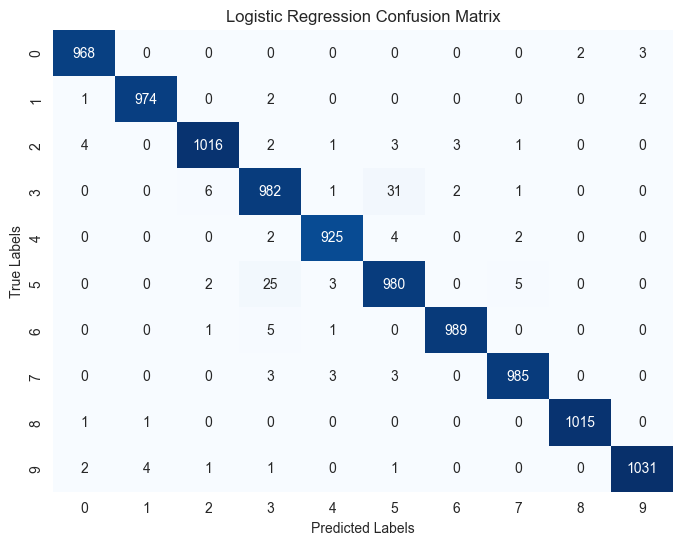

In [45]:
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(log_reg_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_LR.svg', format='svg')
plt.show()

# Decision Tree

### Training Decision Tree without Cross - Validation

In [11]:
best_params_DT = {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}

start_time_DT = time.time()
decision_tree = DecisionTreeClassifier(**best_params_DT)
decision_tree.fit(X_train, y_train)
DT_predictions = decision_tree.predict(X_test)
DT_accuracy = accuracy_score(y_test, DT_predictions)
DT_precision = precision_score(y_test, DT_predictions, average='macro')
DT_recall = recall_score(y_test, DT_predictions, average='macro')
DT_f1 = f1_score(y_test, DT_predictions, average='macro')
end_time_DT = time.time()
time_without_cv_DT = end_time_DT - start_time_DT
cpu_training = cpu_usage()
ram_training = ram_usage()
print(f"Logistic Regression Accuracy: {round(DT_accuracy*100, 2)} %")
print(f"Logistic Regression Precision: {round(DT_precision*100, 2)} %")
print(f"Logistic Regression Recall: {round(DT_recall*100, 2)} %")
print(f"Logistic Regression F1 Score: {round(DT_f1*100, 2)} %")

results['Accuracy [%]'].append(round(DT_accuracy * 100, 2))
results['F1 Score [%]'].append(round(DT_f1 * 100, 2))
results['Recall [%]'].append(round(DT_recall * 100, 2))
results['Precision [%]'].append(round(DT_precision * 100, 2))
results['Time [s]'].append(round(time_without_cv_DT, 2))

cpu_ram_info = cpu_usage(), ram_usage()
results['CPU Usage [%]'].append(cpu_ram_info[0]['CPU Usage [%]'])
results['CPU Maximum frequency [MHz]'].append(cpu_ram_info[0]['CPU Maximum frequency [MHz]'])
results['RAM Usage [%]'].append(cpu_ram_info[1]['RAM Usage [%]'])
results['RAM Used [GB]'].append(cpu_ram_info[1]['RAM Used [GB]'])

Logistic Regression Accuracy: 97.48 %
Logistic Regression Precision: 97.5 %
Logistic Regression Recall: 97.5 %
Logistic Regression F1 Score: 97.5 %


### Training Decision Tree with Cross - Validation

In [12]:
start_time_DT_CV = time.time()
DT_cv_scores = DecisionTreeClassifier(**best_params_DT)
DT_cv_predictions = cross_val_predict(DT_cv_scores, X, Y, cv=5)
DT_cv_scores = cross_val_score(DT_cv_scores, X, Y, cv=5)
DT_mean_accuracy = np.mean(DT_cv_scores)
DT_precision_cv = precision_score(Y, DT_cv_predictions, average='macro')
DT_recall_cv = recall_score(Y, DT_cv_predictions, average='macro')
DT_f1_cv = f1_score(Y, DT_cv_predictions, average='macro')
end_time_DT_CV = time.time()
time_with_cv_DT = end_time_DT_CV - start_time_DT_CV
cpu_training_DT = cpu_usage()
ram_training_DT = ram_usage()

print(f"Decision Tree Cross-Validation Accuracy: {DT_mean_accuracy * 100:.2f} %")
print(f"Decision Tree Cross-Validation Precision: {round(DT_precision_cv * 100, 2)} %")
print(f"Decision Tree Cross-Validation Recall: {round(DT_recall_cv * 100, 2)} %")
print(f"Decision Tree Cross-Validation F1 Score: {round(DT_f1_cv * 100, 2)} %")

results_CV['Accuracy [%]'].append(round(DT_mean_accuracy * 100, 2))
results_CV['F1 Score [%]'].append(round(DT_f1_cv * 100, 2))
results_CV['Recall [%]'].append(round(DT_recall_cv * 100, 2))
results_CV['Precision [%]'].append(round(DT_precision_cv * 100, 2))
results_CV['Time [s]'].append(round(time_with_cv_DT, 2))

cpu_ram_info_cv = cpu_usage(), ram_usage()
results_CV['CPU Usage [%]'].append(cpu_ram_info_cv[0]['CPU Usage [%]'])
results_CV['CPU Maximum frequency [MHz]'].append(cpu_ram_info_cv[0]['CPU Maximum frequency [MHz]'])
results_CV['RAM Usage [%]'].append(cpu_ram_info_cv[1]['RAM Usage [%]'])
results_CV['RAM Used [GB]'].append(cpu_ram_info_cv[1]['RAM Used [GB]'])

Decision Tree Cross-Validation Accuracy: 97.78 %
Decision Tree Cross-Validation Precision: 97.75 %
Decision Tree Cross-Validation Recall: 97.74 %
Decision Tree Cross-Validation F1 Score: 97.74 %


### Decision Tree - Confusion Matrix

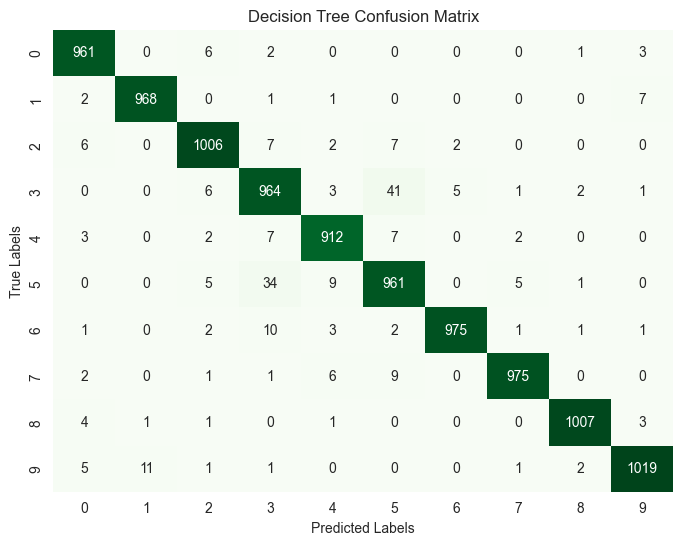

In [46]:
DT_cm = confusion_matrix(y_test, DT_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(DT_cm, annot=True, cmap='Greens', fmt='d', cbar=False)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_DT.svg', format='svg')
plt.show()

# Random Forest

### Training Random Forest without Cross - Validation

In [14]:
best_params_RF = {'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}

start_time_RF = time.time()
random_forest = RandomForestClassifier(**best_params_RF)
random_forest.fit(X_train, y_train)
RF_predictions = random_forest.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_predictions)
RF_precision = precision_score(y_test, RF_predictions, average='macro')
RF_recall = recall_score(y_test, RF_predictions, average='macro')
RF_f1 = f1_score(y_test, RF_predictions, average='macro')
end_time_RF = time.time()
time_without_cv_RF = end_time_RF - start_time_RF
cpu_training = cpu_usage()
ram_training = ram_usage()
print(f"Logistic Regression Accuracy: {round(RF_accuracy*100, 2)} %")
print(f"Logistic Regression Precision: {round(RF_precision*100, 2)} %")
print(f"Logistic Regression Recall: {round(RF_recall*100, 2)} %")
print(f"Logistic Regression F1 Score: {round(RF_f1*100, 2)} %")

results['Accuracy [%]'].append(round(RF_accuracy * 100, 2))
results['F1 Score [%]'].append(round(RF_f1 * 100, 2))
results['Recall [%]'].append(round(RF_recall * 100, 2))
results['Precision [%]'].append(round(RF_precision * 100, 2))
results['Time [s]'].append(round(time_without_cv_RF, 2))

cpu_ram_info = cpu_usage(), ram_usage()
results['CPU Usage [%]'].append(cpu_ram_info[0]['CPU Usage [%]'])
results['CPU Maximum frequency [MHz]'].append(cpu_ram_info[0]['CPU Maximum frequency [MHz]'])
results['RAM Usage [%]'].append(cpu_ram_info[1]['RAM Usage [%]'])
results['RAM Used [GB]'].append(cpu_ram_info[1]['RAM Used [GB]'])

Logistic Regression Accuracy: 98.61 %
Logistic Regression Precision: 98.62 %
Logistic Regression Recall: 98.62 %
Logistic Regression F1 Score: 98.62 %


### Training Random Forest with Cross - Validation

In [15]:
start_time_RF_CV = time.time()
RF_cv_scores = RandomForestClassifier(**best_params_RF)
RF_cv_predictions = cross_val_predict(RF_cv_scores, X, Y, cv=5)
RF_cv_scores = cross_val_score(RF_cv_scores, X, Y, cv=5)
RF_mean_accuracy = np.mean(RF_cv_scores)
RF_precision_cv = precision_score(Y, RF_cv_predictions, average='macro')
RF_recall_cv = recall_score(Y, RF_cv_predictions, average='macro')
RF_f1_cv = f1_score(Y, RF_cv_predictions, average='macro')
end_time_RF_CV = time.time()
time_with_cv_RF = end_time_RF_CV - start_time_RF_CV
cpu_training_RF = cpu_usage()
ram_training_RF = ram_usage()

print(f"Random Forest Cross-Validation Accuracy: {RF_mean_accuracy * 100:.2f} %")
print(f"Random Forest Cross-Validation Precision: {round(RF_precision_cv * 100, 2)} %")
print(f"Random Forest Cross-Validation Recall: {round(RF_recall_cv * 100, 2)} %")
print(f"Random Forest Cross-Validation F1 Score: {round(RF_f1_cv * 100, 2)} %")

results_CV['Accuracy [%]'].append(round(RF_mean_accuracy * 100, 2))
results_CV['F1 Score [%]'].append(round(RF_f1_cv * 100, 2))
results_CV['Recall [%]'].append(round(RF_recall_cv * 100, 2))
results_CV['Precision [%]'].append(round(RF_precision_cv * 100, 2))
results_CV['Time [s]'].append(round(time_with_cv_RF, 2))

cpu_ram_info_cv = cpu_usage(), ram_usage()
results_CV['CPU Usage [%]'].append(cpu_ram_info_cv[0]['CPU Usage [%]'])
results_CV['CPU Maximum frequency [MHz]'].append(cpu_ram_info_cv[0]['CPU Maximum frequency [MHz]'])
results_CV['RAM Usage [%]'].append(cpu_ram_info_cv[1]['RAM Usage [%]'])
results_CV['RAM Used [GB]'].append(cpu_ram_info_cv[1]['RAM Used [GB]'])

Random Forest Cross-Validation Accuracy: 98.78 %
Random Forest Cross-Validation Precision: 98.79 %
Random Forest Cross-Validation Recall: 98.79 %
Random Forest Cross-Validation F1 Score: 98.79 %


### Random Forest - Confusion Matrix

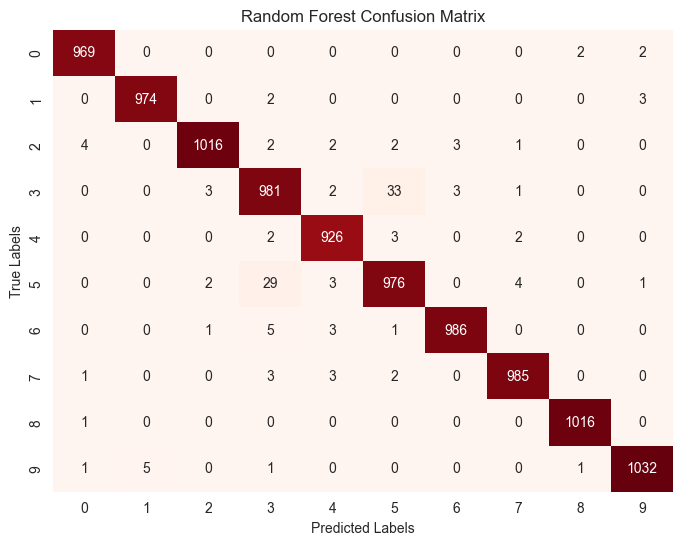

In [47]:
RF_cm = confusion_matrix(y_test, RF_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(RF_cm, annot=True, cmap='Reds', fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_RF.svg', format='svg')
plt.show()

# Support Vector Machine

### Training SVM without Cross - Validation

In [17]:
best_params_SVM = {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

start_time_SVM = time.time()
SVM = SVC(**best_params_SVM)
SVM.fit(X_train, y_train)
SVM_predictions = SVM.predict(X_test)
SVM_accuracy = accuracy_score(y_test, SVM_predictions)
SVM_precision = precision_score(y_test, SVM_predictions, average='macro')
SVM_recall = recall_score(y_test, SVM_predictions, average='macro')
SVM_f1 = f1_score(y_test, SVM_predictions, average='macro')
end_time_SVM = time.time()
time_without_cv_SVM = end_time_SVM - start_time_SVM
cpu_training = cpu_usage()
ram_training = ram_usage()
print(f"Logistic Regression Accuracy: {round(SVM_accuracy*100, 2)} %")
print(f"Logistic Regression Precision: {round(SVM_precision*100, 2)} %")
print(f"Logistic Regression Recall: {round(SVM_recall*100, 2)} %")
print(f"Logistic Regression F1 Score: {round(SVM_f1*100, 2)} %")

results['Accuracy [%]'].append(round(SVM_accuracy * 100, 2))
results['F1 Score [%]'].append(round(SVM_f1 * 100, 2))
results['Recall [%]'].append(round(SVM_recall * 100, 2))
results['Precision [%]'].append(round(SVM_precision * 100, 2))
results['Time [s]'].append(round(time_without_cv_SVM, 2))

cpu_ram_info = cpu_usage(), ram_usage()
results['CPU Usage [%]'].append(cpu_ram_info[0]['CPU Usage [%]'])
results['CPU Maximum frequency [MHz]'].append(cpu_ram_info[0]['CPU Maximum frequency [MHz]'])
results['RAM Usage [%]'].append(cpu_ram_info[1]['RAM Usage [%]'])
results['RAM Used [GB]'].append(cpu_ram_info[1]['RAM Used [GB]'])

Logistic Regression Accuracy: 98.69 %
Logistic Regression Precision: 98.7 %
Logistic Regression Recall: 98.7 %
Logistic Regression F1 Score: 98.7 %


### Training SVM with Cross - Validation

In [18]:
start_time_SVM_CV = time.time()
SVM_cv_scores = SVC(**best_params_SVM)
SVM_cv_predictions = cross_val_predict(SVM_cv_scores, X, Y, cv=5)
SVM_cv_scores = cross_val_score(SVM_cv_scores, X, Y, cv=5)
SVM_mean_accuracy = np.mean(SVM_cv_scores)
SVM_precision_cv = precision_score(Y, SVM_cv_predictions, average='macro')
SVM_recall_cv = recall_score(Y, SVM_cv_predictions, average='macro')
SVM_f1_cv = f1_score(Y, SVM_cv_predictions, average='macro')
end_time_SVM_CV = time.time()
time_with_cv_SVM = end_time_SVM_CV - start_time_SVM_CV
cpu_training_SVM = cpu_usage()
ram_training_SVM = ram_usage()

print(f"SVM Cross-Validation Accuracy: {SVM_mean_accuracy * 100:.2f} %")
print(f"SVM Cross-Validation Precision: {round(SVM_precision_cv * 100, 2)} %")
print(f"SVM Cross-Validation Recall: {round(SVM_recall_cv * 100, 2)} %")
print(f"SVM F1 Cross-Validation Score: {round(SVM_f1_cv * 100, 2)} %")

results_CV['Accuracy [%]'].append(round(SVM_mean_accuracy * 100, 2))
results_CV['F1 Score [%]'].append(round(SVM_f1_cv * 100, 2))
results_CV['Recall [%]'].append(round(SVM_recall_cv * 100, 2))
results_CV['Precision [%]'].append(round(SVM_precision_cv * 100, 2))
results_CV['Time [s]'].append(round(time_with_cv_SVM, 2))

cpu_ram_info_cv = cpu_usage(), ram_usage()
results_CV['CPU Usage [%]'].append(cpu_ram_info_cv[0]['CPU Usage [%]'])
results_CV['CPU Maximum frequency [MHz]'].append(cpu_ram_info_cv[0]['CPU Maximum frequency [MHz]'])
results_CV['RAM Usage [%]'].append(cpu_ram_info_cv[1]['RAM Usage [%]'])
results_CV['RAM Used [GB]'].append(cpu_ram_info_cv[1]['RAM Used [GB]'])

SVM Cross-Validation Accuracy: 98.86 %
SVM Cross-Validation Precision: 98.86 %
SVM Cross-Validation Recall: 98.86 %
SVM F1 Cross-Validation Score: 98.86 %


### Support Vector Machine - Confusion Matrix

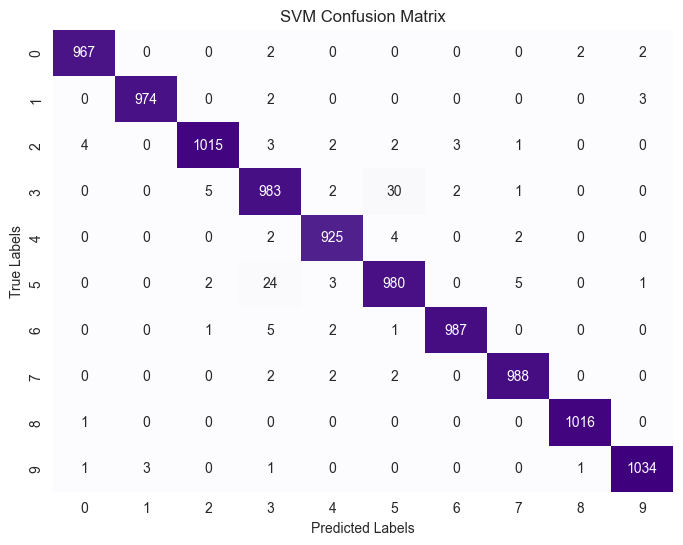

In [48]:
SVM_cm = confusion_matrix(y_test, SVM_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(SVM_cm, annot=True, cmap='Purples', fmt='d', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_SVM.svg', format='svg')
plt.show()

# K-Nearest Neighbors

### Training KNN without Cross - Validation

In [20]:
best_params_KNN = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

start_time_KNN = time.time()
KNN = KNeighborsClassifier(**best_params_KNN)
KNN.fit(X_train, y_train)
KNN_predictions = KNN.predict(X_test)
KNN_accuracy = accuracy_score(y_test, KNN_predictions)
KNN_precision = precision_score(y_test, KNN_predictions, average='macro')
KNN_recall = recall_score(y_test, KNN_predictions, average='macro')
KNN_f1 = f1_score(y_test, KNN_predictions, average='macro')
end_time_KNN = time.time()
time_without_cv_KNN = end_time_KNN - start_time_KNN
cpu_training = cpu_usage()
ram_training = ram_usage()
print(f"Logistic Regression Accuracy: {round(KNN_accuracy*100, 2)} %")
print(f"Logistic Regression Precision: {round(KNN_precision*100, 2)} %")
print(f"Logistic Regression Recall: {round(KNN_recall*100, 2)} %")
print(f"Logistic Regression F1 Score: {round(KNN_f1*100, 2)} %")

results['Accuracy [%]'].append(round(KNN_accuracy * 100, 2))
results['F1 Score [%]'].append(round(KNN_f1 * 100, 2))
results['Recall [%]'].append(round(KNN_recall * 100, 2))
results['Precision [%]'].append(round(KNN_precision * 100, 2))
results['Time [s]'].append(round(time_without_cv_KNN, 2))

cpu_ram_info = cpu_usage(), ram_usage()
results['CPU Usage [%]'].append(cpu_ram_info[0]['CPU Usage [%]'])
results['CPU Maximum frequency [MHz]'].append(cpu_ram_info[0]['CPU Maximum frequency [MHz]'])
results['RAM Usage [%]'].append(cpu_ram_info[1]['RAM Usage [%]'])
results['RAM Used [GB]'].append(cpu_ram_info[1]['RAM Used [GB]'])

Logistic Regression Accuracy: 98.58 %
Logistic Regression Precision: 98.59 %
Logistic Regression Recall: 98.59 %
Logistic Regression F1 Score: 98.59 %


### Training KNN with Cross - Validation

In [21]:
start_time_KNN_CV = time.time()
KNN_cv_scores = KNeighborsClassifier(**best_params_KNN)
KNN_cv_predictions = cross_val_predict(KNN_cv_scores, X, Y, cv=5)
KNN_cv_scores = cross_val_score(KNN_cv_scores, X, Y, cv=5)
KNN_mean_accuracy = np.mean(KNN_cv_scores)
KNN_precision_cv = precision_score(Y, KNN_cv_predictions, average='macro')
KNN_recall_cv = recall_score(Y, KNN_cv_predictions, average='macro')
KNN_f1_cv = f1_score(Y, KNN_cv_predictions, average='macro')
end_time_KNN_CV = time.time()
time_with_cv_KNN = end_time_KNN_CV - start_time_KNN_CV
cpu_training_KNN = cpu_usage()
ram_training_KNN = ram_usage()

print(f"KNN Cross-Validation Accuracy: {KNN_mean_accuracy * 100:.2f} %")
print(f"KNN Cross-Validation Precision: {round(KNN_precision_cv * 100, 2)} %")
print(f"KNN Cross-Validation Recall: {round(KNN_recall_cv * 100, 2)} %")
print(f"KNN Cross-Validation F1 Score: {round(KNN_f1_cv * 100, 2)} %")

results_CV['Accuracy [%]'].append(round(KNN_mean_accuracy * 100, 2))
results_CV['F1 Score [%]'].append(round(KNN_f1_cv * 100, 2))
results_CV['Recall [%]'].append(round(KNN_recall_cv * 100, 2))
results_CV['Precision [%]'].append(round(KNN_precision_cv * 100, 2))
results_CV['Time [s]'].append(round(time_with_cv_KNN, 2))

cpu_ram_info_cv = cpu_usage(), ram_usage()
results_CV['CPU Usage [%]'].append(cpu_ram_info_cv[0]['CPU Usage [%]'])
results_CV['CPU Maximum frequency [MHz]'].append(cpu_ram_info_cv[0]['CPU Maximum frequency [MHz]'])
results_CV['RAM Usage [%]'].append(cpu_ram_info_cv[1]['RAM Usage [%]'])
results_CV['RAM Used [GB]'].append(cpu_ram_info_cv[1]['RAM Used [GB]'])

KNN Cross-Validation Accuracy: 98.80 %
KNN Cross-Validation Precision: 98.8 %
KNN Cross-Validation Recall: 98.8 %
KNN Cross-Validation F1 Score: 98.8 %


### K-Nearest Neighbors - Confusion Matrix

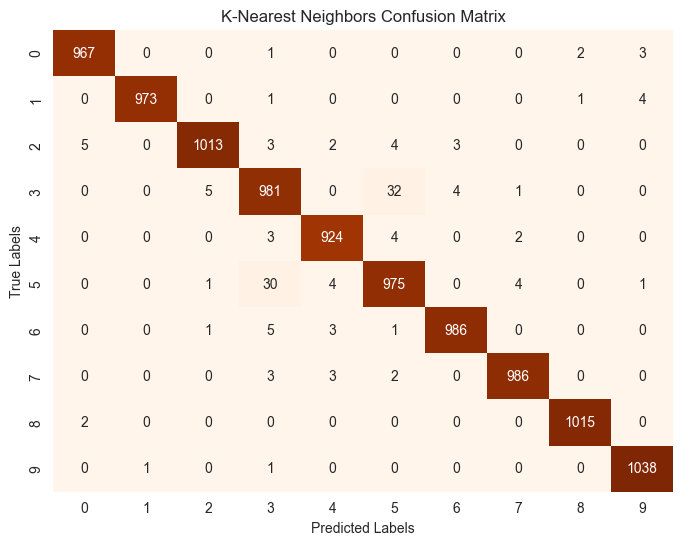

In [49]:
KNN_cm = confusion_matrix(y_test, KNN_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(KNN_cm, annot=True, cmap='Oranges', fmt='d', cbar=False)
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_KNN.svg', format='svg')
plt.show()

# XGBoost

### Training XGB without Cross - Validation

In [23]:
best_params_XGB = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

start_time_XGB = time.time()
XGB = XGBClassifier(**best_params_XGB)
XGB.fit(X_train, y_train)
XGB_predictions = XGB.predict(X_test)
XGB_accuracy = accuracy_score(y_test, XGB_predictions)
XGB_precision = precision_score(y_test, XGB_predictions, average='macro')
XGB_recall = recall_score(y_test, XGB_predictions, average='macro')
XGB_f1 = f1_score(y_test, XGB_predictions, average='macro')
end_time_XGB = time.time()
time_without_cv_XGB = end_time_XGB - start_time_XGB
cpu_training = cpu_usage()
ram_training = ram_usage()
print(f"Logistic Regression Accuracy: {round(XGB_accuracy*100, 2)} %")
print(f"Logistic Regression Precision: {round(XGB_precision*100, 2)} %")
print(f"Logistic Regression Recall: {round(XGB_recall*100, 2)} %")
print(f"Logistic Regression F1 Score: {round(XGB_f1*100, 2)} %")

results['Accuracy [%]'].append(round(XGB_accuracy * 100, 2))
results['F1 Score [%]'].append(round(XGB_f1 * 100, 2))
results['Recall [%]'].append(round(XGB_recall * 100, 2))
results['Precision [%]'].append(round(XGB_precision * 100, 2))
results['Time [s]'].append(round(time_without_cv_XGB, 2))

cpu_ram_info = cpu_usage(), ram_usage()
results['CPU Usage [%]'].append(cpu_ram_info[0]['CPU Usage [%]'])
results['CPU Maximum frequency [MHz]'].append(cpu_ram_info[0]['CPU Maximum frequency [MHz]'])
results['RAM Usage [%]'].append(cpu_ram_info[1]['RAM Usage [%]'])
results['RAM Used [GB]'].append(cpu_ram_info[1]['RAM Used [GB]'])

Logistic Regression Accuracy: 98.57 %
Logistic Regression Precision: 98.58 %
Logistic Regression Recall: 98.58 %
Logistic Regression F1 Score: 98.58 %


### Training XGB with Cross - Validation

In [24]:
start_time_XGB_CV = time.time()
XGB_cv_scores = XGBClassifier(**best_params_XGB)
XGB_cv_predictions = cross_val_predict(XGB_cv_scores, X, Y, cv=5)
XGB_cv_scores = cross_val_score(XGB_cv_scores, X, Y, cv=5)
XGB_mean_accuracy = np.mean(XGB_cv_scores)
XGB_precision_cv = precision_score(Y, XGB_cv_predictions, average='macro')
XGB_recall_cv = recall_score(Y, XGB_cv_predictions, average='macro')
XGB_f1_cv = f1_score(Y, XGB_cv_predictions, average='macro')
end_time_XGB_CV = time.time()
time_with_cv_XGB = end_time_XGB_CV - start_time_XGB_CV
cpu_training_XGB = cpu_usage()
ram_training_XGB = ram_usage()

print(f"XGBoost Cross-Validation Accuracy: {XGB_mean_accuracy * 100:.2f} %")
print(f"XGBoost Cross-Validation Precision: {round(XGB_precision_cv * 100, 2)} %")
print(f"XGBoost Cross-Validation Recall: {round(XGB_recall_cv * 100, 2)} %")
print(f"XGBoost Cross-Validation F1 Score: {round(XGB_f1_cv * 100, 2)} %")

results_CV['Accuracy [%]'].append(round(XGB_mean_accuracy * 100, 2))
results_CV['F1 Score [%]'].append(round(XGB_f1_cv * 100, 2))
results_CV['Recall [%]'].append(round(XGB_recall_cv * 100, 2))
results_CV['Precision [%]'].append(round(XGB_precision_cv * 100, 2))
results_CV['Time [s]'].append(round(time_with_cv_XGB, 2))

cpu_ram_info_cv = cpu_usage(), ram_usage()
results_CV['CPU Usage [%]'].append(cpu_ram_info_cv[0]['CPU Usage [%]'])
results_CV['CPU Maximum frequency [MHz]'].append(cpu_ram_info_cv[0]['CPU Maximum frequency [MHz]'])
results_CV['RAM Usage [%]'].append(cpu_ram_info_cv[1]['RAM Usage [%]'])
results_CV['RAM Used [GB]'].append(cpu_ram_info_cv[1]['RAM Used [GB]'])

XGBoost Cross-Validation Accuracy: 98.70 %
XGBoost Cross-Validation Precision: 98.7 %
XGBoost Cross-Validation Recall: 98.7 %
XGBoost Cross-Validation F1 Score: 98.7 %


### XGBoost - Confusion Matrix 

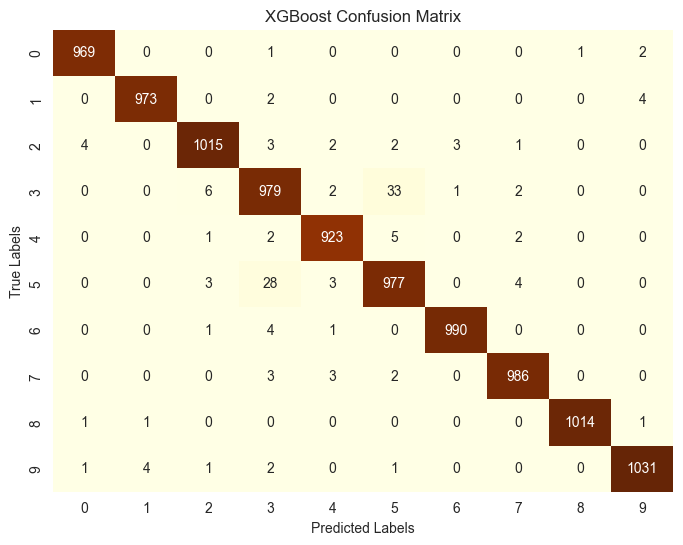

In [50]:
XGB_cm = confusion_matrix(y_test, XGB_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(XGB_cm, annot=True, cmap='YlOrBr', fmt='d', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix_XGB.svg', format='svg')
plt.show()

# Results Table

In [26]:
df_results = pd.DataFrame(results)
df_results.head(10)

,Algorithm,Accuracy [%],F1 Score [%],Recall [%],Precision [%],Time [s],CPU Usage [%],CPU Maximum frequency [MHz],RAM Usage [%],RAM Used [GB]
0,Logistic Regression,98.65,98.66,98.66,98.66,3.84,20.0,3000.0,19.0,12.125229
1,Decision Tree,97.48,97.50,97.50,97.50,4.17,0.0,3000.0,19.2,12.229996
2,Random Forest,98.61,98.62,98.62,98.62,40.42,0.0,3000.0,19.1,12.171062
3,SVM,98.69,98.70,98.70,98.70,4.76,14.3,3000.0,20.9,13.324493
4,K-Nearest Neighbors,98.58,98.59,98.59,98.59,2.39,0.0,3000.0,20.8,13.278751
5,XGBoost,98.57,98.58,98.58,98.58,5.59,0.0,3000.0,20.6,13.138233


In [27]:
df_results_cv = pd.DataFrame(results_CV)
df_results_cv.head(10)

,Algorithm,Accuracy [%],F1 Score [%],Recall [%],Precision [%],Time [s],CPU Usage [%],CPU Maximum frequency [MHz],RAM Usage [%],RAM Used [GB]
0,Logistic Regression,98.79,98.79,98.79,98.79,197.03,0.0,3000.0,19.2,12.257263
1,Decision Tree,97.78,97.74,97.74,97.75,43.35,0.0,3000.0,19.1,12.177761
2,Random Forest,98.78,98.79,98.79,98.79,421.86,12.5,3000.0,20.8,13.264698
3,SVM,98.86,98.86,98.86,98.86,39.08,71.4,3000.0,20.8,13.270939
4,K-Nearest Neighbors,98.80,98.80,98.80,98.80,22.50,100.0,3000.0,20.6,13.103848
5,XGBoost,98.70,98.70,98.70,98.70,21.45,14.3,3000.0,20.9,13.315510


# Prediction - Logistic Regression

### Logistic Regression without Cross - Validation

In [28]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_LR = []

for feature in X_blind_transformed:
    pred = log_reg.predict([feature])
    pred_list_LR.append(pred)
    flat_list_LR = [num for sublist in pred_list_LR for num in sublist]

data = {
    'Output predicted': flat_list_LR,
}

df_pre_LR = pd.DataFrame(data)
df_pre_LR.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


### Logistic Regression with Cross - Validation

In [29]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_LRCV = []

best_model_index = np.argmax(log_reg_cv_predictions)
best_log_reg_model = LogisticRegression(max_iter=10000)
best_log_reg_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_log_reg_model.predict([feature])
    pred_list_LRCV.append(pred)
    flat_list_LRCV = [num for sublist in pred_list_LRCV for num in sublist]
    
data = {
    'Output predicted': flat_list_LRCV,
}

df_pre_LRCV = pd.DataFrame(data)
df_pre_LRCV.head(10000)

,Output predicted
0,3
1,1
2,0
3,0
4,6
...,...
9995,6
9996,3
9997,2
9998,6


# Prediction - Decision Tree

### Decision Tree without Cross - Validation

In [30]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_DT = []

for feature in X_blind_transformed:
    pred = decision_tree.predict([feature])
    pred_list_DT.append(pred)
    flat_list_DT = [num for sublist in pred_list_DT for num in sublist]

data = {
    'Output predicted': flat_list_DT,
}

df_pre_DT = pd.DataFrame(data)
df_pre_DT.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


### Decision Tree with Cross - Validation

In [31]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_DTCV = []

best_model_index = np.argmax(DT_cv_scores)
best_DT_model = DecisionTreeClassifier()
best_DT_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_DT_model.predict([feature])
    pred_list_DTCV.append(pred)
    flat_list_DTCV = [num for sublist in pred_list_DTCV for num in sublist]
    
data = {
    'Output predicted': flat_list_DTCV,
}

df_pre_DTCV = pd.DataFrame(data)
df_pre_DTCV.head(10000)

,Output predicted
0,4
1,4
2,4
3,8
4,2
...,...
9995,4
9996,2
9997,5
9998,2


# Prediction - Random Forest

### Random Forest without Cross - Validation

In [32]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_RF = []

for feature in X_blind_transformed:
    pred = random_forest.predict([feature])
    pred_list_RF.append(pred)
    flat_list_RF = [num for sublist in pred_list_RF for num in sublist]
    
data = {
    'Output predicted': flat_list_RF,
}

df_pre_RF = pd.DataFrame(data)
df_pre_RF.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


### Random Forest with Cross - Validation

In [33]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_RFCV = []

best_model_index = np.argmax(RF_cv_scores)
best_RF_model = RandomForestClassifier()
best_RF_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_RF_model.predict([feature])
    pred_list_RFCV.append(pred)
    flat_list_RFCV = [num for sublist in pred_list_RFCV for num in sublist]
    
data = {
    'Output predicted': flat_list_RFCV,
}

df_pre_RFCV = pd.DataFrame(data)
df_pre_RFCV.head(10000)

,Output predicted
0,3
1,8
2,8
3,8
4,6
...,...
9995,8
9996,3
9997,5
9998,9


# Prediction - Support Vector Machine

### Support Vector Machine without Cross-Validation

In [34]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_SVM = []

for feature in X_blind_transformed:
    pred = SVM.predict([feature])
    pred_list_SVM.append(pred)
    flat_list_SVM = [num for sublist in pred_list_SVM for num in sublist]
    
data = {
    'Output predicted': flat_list_SVM,
}

df_pre_SVM = pd.DataFrame(data)
df_pre_SVM.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


### Support Vector Machine with Cross-Validation

In [35]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_SVMCV = []

best_model_index = np.argmax(SVM_cv_scores)
best_SVM_model = SVC()
best_SVM_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_SVM_model.predict([feature])
    pred_list_SVMCV.append(pred)
    flat_list_SVMCV = [num for sublist in pred_list_SVMCV for num in sublist]
    
data = {
    'Output predicted': flat_list_SVMCV,
}

df_pre_SVMCV = pd.DataFrame(data)
df_pre_SVMCV.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,3
9996,3
9997,5
9998,5


# Prediction - K-Nearest Neighbors

### K-Nearest Neighbors without Cross-Validation

In [36]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_KNN = []

for feature in X_blind_transformed:
    pred = KNN.predict([feature])
    pred_list_KNN.append(pred)
    flat_list_KNN = [num for sublist in pred_list_KNN for num in sublist]
    
data = {
    'Output predicted': flat_list_KNN,
}

df_pre_KNN = pd.DataFrame(data)
df_pre_KNN.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


### K-Nearest Neighbors with Cross-Validation

In [37]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_KNNCV = []

best_model_index = np.argmax(KNN_cv_scores)
best_KNN_model = KNeighborsClassifier()
best_KNN_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_KNN_model.predict([feature])
    pred_list_KNNCV.append(pred)
    flat_list_KNNCV = [num for sublist in pred_list_KNNCV for num in sublist]

data = {
    'Output predicted': flat_list_KNNCV,
}

df_pre_KNNCV = pd.DataFrame(data)
df_pre_KNNCV.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,3
9996,3
9997,5
9998,5


# Prediction - XGB

### XGB without Cross-Validation

In [38]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_XGB = []

for feature in X_blind_transformed:
    pred = XGB.predict([feature])
    pred_list_XGB.append(pred)
    flat_list_XGB = [num for sublist in pred_list_XGB for num in sublist]
    
data = {
    'Output predicted': flat_list_XGB,
}

df_pre_XGB = pd.DataFrame(data)
df_pre_XGB.head(10000)

,Output predicted
0,3
1,8
2,8
3,0
4,6
...,...
9995,8
9996,3
9997,5
9998,1


### XGB with Cross-Validation

In [39]:
X_blind = load_data(filepath_prediction)[0]
X_blind_transformed = scaler.transform(X_blind)
pred_list_XGBCV = []

best_model_index = np.argmax(XGB_cv_scores)
best_XGB_model = XGBClassifier()
best_XGB_model.fit(X, Y)

for feature in X_blind_transformed:
    pred = best_XGB_model.predict([feature])
    pred_list_XGBCV.append(pred)
    flat_list_XGBCV = [num for sublist in pred_list_XGBCV for num in sublist]
    
data = {
    'Output predicted': flat_list_XGBCV,
}

df_pre_XGBCV = pd.DataFrame(data)
df_pre_XGBCV.head(10000)

,Output predicted
0,3
1,8
2,6
3,0
4,6
...,...
9995,6
9996,3
9997,5
9998,5


# Export results to CSV - Blind_test1.csv

### Predictions Table

In [40]:
predictions_df = pd.DataFrame({
    'Logistic Regression': flat_list_LR,
    'Decision Tree': flat_list_DT,
    'Random Forest': flat_list_RF,
    'SVM': flat_list_SVM,
    'K-Nearest Neighbors': flat_list_KNN,
    'XGB': flat_list_XGB,
    'Logistic Regression CV': flat_list_LRCV,
    'Decision Tree CV': flat_list_DTCV,
    'Random Forest CV': flat_list_RFCV,
    'SVM CV': flat_list_SVMCV,
    'K-Nearest Neighbors CV': flat_list_KNNCV,
    'XGB CV': flat_list_XGBCV
})

predictions_df.to_excel('predictions_blind_test1.xlsx', index=True)

### Comparison of algorithms with and without Cross - Validation

In [41]:
counter_LR = 0
counter_DT = 0
counter_RF = 0
counter_SVM = 0
counter_KNN = 0
counter_XGB = 0

for i1, j1 in zip(flat_list_LR, flat_list_LRCV):
    if i1 == j1:
        counter_LR += 1
    else:
        counter_LR += 0

for i2, j2 in zip(flat_list_DT, flat_list_DTCV):
    if i2 == j2:
        counter_DT += 1
    else:
        counter_DT += 0

for i3, j3 in zip(flat_list_RF, flat_list_RFCV):
    if i3 == j3:
        counter_RF += 1
    else:
        counter_RF += 0

for i4, j4 in zip(flat_list_SVM, flat_list_SVMCV):
    if i4 == j4:
        counter_SVM += 1
    else:
        counter_SVM += 0

for i5, j5 in zip(flat_list_KNN, flat_list_KNNCV):
    if i5 == j5:
        counter_KNN += 1
    else:
        counter_KNN += 0
        
for i6, j6 in zip(flat_list_XGB, flat_list_XGBCV):
    if i6 == j6:
        counter_XGB += 1
    else:
        counter_XGB += 0
        
data = {
    'Modello': ['LR', 'DT', 'RF', 'SVM', 'KNN', 'XGB'],
    'Equal results [%]': [counter_LR/100, counter_DT/100, counter_RF/100, counter_SVM/100, counter_KNN/100, counter_XGB/100]
}

df_exp_acc = pd.DataFrame(data)
df_exp_acc.head(6)

,Modello,Equal results [%]
0,LR,82.02
1,DT,36.01
2,RF,74.29
3,SVM,87.59
4,KNN,90.85
5,XGB,69.45


# Best hyperparameters with GridSearchCV

### Best Hyperparameters SVM

param_grid_SVM = {
    'C': [0.1, 1, 10, 100],  
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf', 'linear', 'poly']
}

svm = SVC()
grid_search_SVM = GridSearchCV(svm, param_grid_SVM, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_SVM.fit(X_train, y_train)

best_params_SVM = grid_search_SVM.best_params_
best_estimator_SVM = grid_search_SVM.best_estimator_

best_estimator_SVM.fit(X_train, y_train)
predictions_SVM = best_estimator_SVM.predict(X_test)

print(grid_search_SVM.best_params_) 
print(grid_search_SVM.best_estimator_)

### Best Hyperparameters Decision Tree

param_grid_DT = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier()
grid_search_DT = GridSearchCV(decision_tree, param_grid_DT, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_DT.fit(X_train, y_train)

best_params_DT = grid_search_DT.best_params_
best_estimator_DT = grid_search_DT.best_estimator_

best_estimator_DT.fit(X_train, y_train)
predictions_DT = best_estimator_DT.predict(X_test)

print(grid_search_DT.best_params_) 
print(grid_search_DT.best_estimator_)

### Best Hyperparameters Random Forest

param_grid_RF = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10]
}

random_forest = RandomForestClassifier()
grid_search_RF = GridSearchCV(random_forest, param_grid_RF, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_RF.fit(X_train, y_train)

best_params_RF = grid_search_RF.best_params_
best_estimator_RF = grid_search_RF.best_estimator_

best_estimator_RF.fit(X_train, y_train)
predictions_RF = best_estimator_RF.predict(X_test)

print(grid_search_RF.best_params_) 
print(grid_search_RF.best_estimator_)

### Best Hyperparameters K-Nearest Neighbors

param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search_KNN = GridSearchCV(knn, param_grid_KNN, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_KNN.fit(X_train, y_train)

best_params_KNN = grid_search_KNN.best_params_
best_estimator_KNN = grid_search_KNN.best_estimator_

best_estimator_KNN.fit(X_train, y_train)
predictions_KNN = best_estimator_KNN.predict(X_test)

print(grid_search_KNN.best_params_) 
print(grid_search_KNN.best_estimator_)

### Best Hyperparameters XGBoost

param_grid_XGB = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

xgb = XGBClassifier()
grid_search_XGB = GridSearchCV(xgb, param_grid_XGB, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_XGB.fit(X_train, y_train)

best_params_XGB = grid_search_XGB.best_params_
best_estimator_XGB = grid_search_XGB.best_estimator_

best_estimator_XGB.fit(X_train, y_train)
predictions_XGB = best_estimator_XGB.predict(X_test)

print(grid_search_XGB.best_params_) 
print(grid_search_XGB.best_estimator_)

### Best Hyperparameters Logistic Regression

param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=10000)
grid_search_LR = GridSearchCV(log_reg, param_grid_LR, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_LR.fit(X_train, y_train)

best_params_LR = grid_search_LR.best_params_
best_estimator_LR = grid_search_LR.best_estimator_

best_estimator_LR.fit(X_train, y_train)
predictions_LR = best_estimator_LR.predict(X_test)

print(grid_search_LR.best_params_) 
print(grid_search_LR.best_estimator_)